# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tweepy
import json
import requests
import os
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [77]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [78]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url) 
response

<Response [200]>

In [79]:
with open('image_prediction.tsv', mode='wb') as file:
    file.write(response.content)
images=pd.read_csv('image_prediction.tsv',delimiter='\t')    
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [80]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
        #    tweet = api.get_status(tweet_id, tweet_mode='extended')
         #   print("Success")
          #  json.dump(tweet._json, outfile)
           # outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
          #  fails_dict[tweet_id] = e
           # pass
#end = timer()
#print(end - start)

#defining the information we'll be using out of the tweets 
variables = ['id', 'favorite_count', 'retweet_count']

#reading the json file into a dictionary
tweets = []
with open('tweet_json.txt', 'r') as r: 
    json_tweet = r.readline()
    while json_tweet:
        dictionary = json.loads(json_tweet)
        data_row = dict((i, dictionary[i]) for i in variables)
        tweets.append(data_row)
        json_tweet = r.readline()
        
            
# creating a dataframe based on the dictionary   
tweet_data = pd.DataFrame.from_dict(tweets)

# confirming the information is now in the data frame
tweet_data.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [81]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [82]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [83]:
archive.duplicated().value_counts()

False    2356
dtype: int64

In [84]:
archive.query("name == 'None'").count()

tweet_id                      745
in_reply_to_status_id          77
in_reply_to_user_id            77
timestamp                     745
source                        745
text                          745
retweeted_status_id            65
retweeted_status_user_id       65
retweeted_status_timestamp     65
expanded_urls                 686
rating_numerator              745
rating_denominator            745
name                          745
doggo                         745
floofer                       745
pupper                        745
puppo                         745
dtype: int64

In [85]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [86]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [87]:
images.query("p1_dog == False").count()

tweet_id    543
jpg_url     543
img_num     543
p1          543
p1_conf     543
p1_dog      543
p2          543
p2_conf     543
p2_dog      543
p3          543
p3_conf     543
p3_dog      543
dtype: int64

In [88]:
images.duplicated().value_counts()

False    2075
dtype: int64

In [89]:
tweet_data.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [90]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [91]:
tweet_data.duplicated().value_counts()

False    2354
dtype: int64

### Quality issues
1. There are tweets that do not have images

2. Some dogs have invalid names, such as None, a, an

3. Timestamps should be datetime instead of float64

4. In the archive, the columns for doggo, floofer, pupper, and puppo should be combined into a single column

5. In the images, some of the breeds listed are objects

6. In images, some breeds are actually other animals

7. Archive contains retweets, which are not what we're looking for

8. In the columns for doggo, floofer, pupper, and puppo, if there isn't a value, it should be changed from None to NULL

### Tidiness issues
1. The dog stage should form a single column, instead of four

2. All of the dataframes should be merged into one.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [92]:
# Make copies of original pieces of data
archive_clean = archive.copy()
images_clean = images.copy()
tweet_data_clean = tweet_data.copy()

### Issue #1: archive contains retweets, which are not what we want in this dataset.

#### Define: Remove retweets from archive_clean 

#### Code

In [93]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

#### Test

In [94]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #2: Some names listed are invalid, such as a, an, or None

#### Define Change invalid names such as a or a to None, and then change None to NULL

#### Code

In [95]:
archive_clean.loc[archive_clean['name'] == archive_clean['name'].str.lower(), 'name'] = np.nan

In [96]:
archive_clean['name'].replace('None', np.nan, inplace=True)

#### Test

In [97]:
archive_clean.query("name == 'an'").count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [98]:
archive_clean.query("name == 'None'").count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

### Issue #3: Datatype of timestamps is float64 when it should be datetime

#### Define Change datatype of timestamps to datetime instead of float64

#### Code

In [99]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [100]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

### Issue #4: The columns doggo, floofer, pupper, and puppo should be a single column
### Issue #5: There are values of None in those columns. should be replaced with NaN

#### Define Combine the columns for doggo, floofer, pupper, and puppo into a single column and change any values of None to NaN

#### Code

In [101]:
#change all values of None to an empty string
archive_clean.doggo=archive_clean.doggo.replace('None','')
archive_clean.floofer=archive_clean.floofer.replace('None','')
archive_clean.pupper=archive_clean.pupper.replace('None','')
archive_clean.puppo=archive_clean.puppo.replace('None','')

In [102]:
#combine the four columns into one column named dog_types
cols = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean['dog_types'] = archive_clean[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [103]:
#drop original four columns (doggo, floofer, pupper, and puppo)
archive_clean=archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [104]:
#replace any values that are still empty strings with NaN
archive_clean.dog_types=archive_clean.dog_types.replace('', np.nan)

In [105]:
archive_clean.loc[archive_clean.dog_types == 'doggopupper', 'dog_types'] = 'doggo, pupper'

In [106]:
archive_clean.loc[archive_clean.dog_types == 'doggofloofer', 'dog_types'] = 'doggo, floofer'

In [107]:
archive_clean.loc[archive_clean.dog_types == 'doggopuppo', 'dog_types'] = 'doggo, puppo'

#### Test

In [108]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1391 non-null object
dog_types                     344 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 254.9+ KB


In [109]:
archive_clean.dog_types.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_types, dtype: int64

In [110]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_types
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Issue #6: Some images are labled as things other than dogs

#### Define Remove rows where the images are labeled as not dogs. This handles both the issue where the images are labled as objects and the issue where they are labled as other animals.

#### Code

In [111]:
images_clean = (images_clean[(images_clean['p1_dog']==True)])
images_clean = (images_clean[(images_clean['p2_dog']==True)])
images_clean = (images_clean[(images_clean['p3_dog']==True)])

#### Test

In [112]:
images_clean.query("p1_dog == False").count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [113]:
images_clean.query("p2_dog == False").count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [114]:
images_clean.query("p3_dog == False").count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Issue #7: Ratings should be combined into a single value

#### Define combine the ratings columns

#### Code

In [115]:
cols = ['rating_numerator', 'rating_denominator']
archive_clean['dog_ratings'] = archive_clean[cols].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)

In [116]:
archive_clean=archive_clean.drop(['rating_numerator', 'rating_denominator'],axis=1)

In [117]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
name                          1391 non-null object
dog_types                     344 non-null object
dog_ratings                   2175 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 237.9+ KB


In [118]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,dog_types,dog_ratings
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,13/10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,13/10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,12/10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,13/10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,12/10


#### Test

### Issue #8: Some tweets are replies to other tweets, these should be removed.

#### Define Remove tweet replies from archive_clean

#### Code

In [119]:
archive_clean = archive_clean[archive_clean['in_reply_to_user_id'].isnull()]

#### Test

In [120]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
name                          1390 non-null object
dog_types                     336 non-null object
dog_ratings                   2097 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 229.4+ KB


### Issue #9: There are unneccessary columns that are primarially NULL values

#### Define Drop unnecessary columns

#### Code

In [121]:
archive_clean=archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'retweeted_status_user_id'],axis=1)

#### Test

In [122]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2097 non-null int64
timestamp        2097 non-null datetime64[ns]
source           2097 non-null object
text             2097 non-null object
expanded_urls    2094 non-null object
name             1390 non-null object
dog_types        336 non-null object
dog_ratings      2097 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 147.4+ KB


### Issue #10: Img_num column is unnecessary

#### Drop img_num column

#### Code

In [123]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1243 non-null int64
jpg_url     1243 non-null object
img_num     1243 non-null int64
p1          1243 non-null object
p1_conf     1243 non-null float64
p1_dog      1243 non-null bool
p2          1243 non-null object
p2_conf     1243 non-null float64
p2_dog      1243 non-null bool
p3          1243 non-null object
p3_conf     1243 non-null float64
p3_dog      1243 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 100.8+ KB


In [124]:
images_clean.drop('img_num', axis=1, inplace=True)

#### Test

In [125]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1243 non-null int64
jpg_url     1243 non-null object
p1          1243 non-null object
p1_conf     1243 non-null float64
p1_dog      1243 non-null bool
p2          1243 non-null object
p2_conf     1243 non-null float64
p2_dog      1243 non-null bool
p3          1243 non-null object
p3_conf     1243 non-null float64
p3_dog      1243 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 91.0+ KB


In [126]:
tweet_data_clean.rename(columns={'id' : 'tweet_id'}, inplace=True)

In [127]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [128]:
tweet_data_clean=tweet_data_clean[~(tweet_data_clean.tweet_id.duplicated())]
archive_clean=pd.merge(archive_clean,tweet_data_clean,on='tweet_id',how='left')


In [129]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 10 columns):
tweet_id          2097 non-null int64
timestamp         2097 non-null datetime64[ns]
source            2097 non-null object
text              2097 non-null object
expanded_urls     2094 non-null object
name              1390 non-null object
dog_types         336 non-null object
dog_ratings       2097 non-null object
favorite_count    2097 non-null int64
retweet_count     2097 non-null int64
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 180.2+ KB


In [131]:

twitter_archive_master=pd.merge(archive_clean,images_clean,on='tweet_id',how='left')


In [132]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 20 columns):
tweet_id          2097 non-null int64
timestamp         2097 non-null datetime64[ns]
source            2097 non-null object
text              2097 non-null object
expanded_urls     2094 non-null object
name              1390 non-null object
dog_types         336 non-null object
dog_ratings       2097 non-null object
favorite_count    2097 non-null int64
retweet_count     2097 non-null int64
jpg_url           1194 non-null object
p1                1194 non-null object
p1_conf           1194 non-null float64
p1_dog            1194 non-null object
p2                1194 non-null object
p2_conf           1194 non-null float64
p2_dog            1194 non-null object
p3                1194 non-null object
p3_conf           1194 non-null float64
p3_dog            1194 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(13)
memory usage: 344.0+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [133]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
images_clean.p1.value_counts()

golden_retriever                  126
Pembroke                           78
Labrador_retriever                 77
Chihuahua                          54
pug                                41
Pomeranian                         28
Samoyed                            27
chow                               27
toy_poodle                         27
malamute                           26
cocker_spaniel                     25
miniature_pinscher                 21
French_bulldog                     20
beagle                             18
Siberian_husky                     17
Staffordshire_bullterrier          17
German_shepherd                    17
Cardigan                           16
Shetland_sheepdog                  15
Chesapeake_Bay_retriever           15
Shih-Tzu                           15
Rottweiler                         15
Maltese_dog                        15
Lakeland_terrier                   14
Eskimo_dog                         14
American_Staffordshire_terrier     13
Great_Pyrene

### Insights:
1. The most common breed assigned in images is Golden Retriever. 

2. The most common dog type is pupper, and some dogs have mulitple types.

3. There is a positive correlation between favorite count and retweet count, although there is a large number of tweets that were retweeted, but not favorited.

### Visualization

In [134]:
twitter_archive_master.dog_types.value_counts()

pupper            221
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_types, dtype: int64

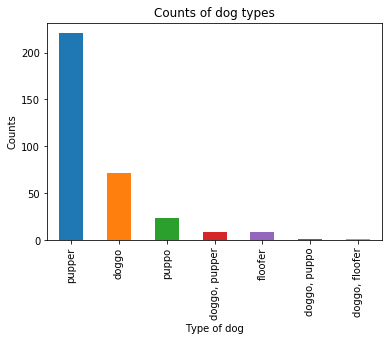

In [135]:
twitter_archive_master['dog_types'].value_counts().plot(kind='bar');
plt.xlabel("Type of dog");
plt.ylabel("Counts");
plt.title("Counts of dog types");


In [136]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 20 columns):
tweet_id          2097 non-null int64
timestamp         2097 non-null datetime64[ns]
source            2097 non-null object
text              2097 non-null object
expanded_urls     2094 non-null object
name              1390 non-null object
dog_types         336 non-null object
dog_ratings       2097 non-null object
favorite_count    2097 non-null int64
retweet_count     2097 non-null int64
jpg_url           1194 non-null object
p1                1194 non-null object
p1_conf           1194 non-null float64
p1_dog            1194 non-null object
p2                1194 non-null object
p2_conf           1194 non-null float64
p2_dog            1194 non-null object
p3                1194 non-null object
p3_conf           1194 non-null float64
p3_dog            1194 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(13)
memory usage: 344.0+ KB


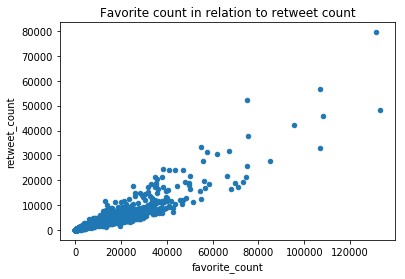

In [137]:
twitter_archive_master.plot.scatter(x="favorite_count", y="retweet_count");
plt.title("Favorite count in relation to retweet count");